# Round 3. Implementing the Barabási-Albert (BA) model
The Barabási-Albert scale-free network model is a model of network growth, where new nodes continuously enter the network and make links to existing nodes with a probability that is linearly proportional to their degree. The steps required for generating a Barabási-Albert scale-free network with $N$ nodes are as follows:

- Create a small seed network which has at least $m$ nodes, where $m$ is the number of links a new node creates to already existing nodes.  In this exercise, use a 3-clique as the seed network.
- Add new nodes to the network until your network has $N$ nodes, such that each entering node has $m$ links and connects to existing nodes proportional to their degrees.

In this exercise, we will implement the model and investigate the networks it generates. The template file `implementing_ba_model.py` is provided which covers most of the plotting and binning required for this exercise. This notebook has the same functions as the template and can be used for solving the exercise too. This would let you focus on the actual implementation of the model. Using the template or the notebook is \textbf{optional}. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Begin of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

In [2]:
def lin_log_bins(max_degree):
    # lin-log binning: for k=1..10 use linear bins, then logarithmic bins
    # have the number of logbins such that there are 10 bins per decade

    num_logbins = int(np.log10(1.5 * max_degree) - np.log10(1.5)) * 10

    # generate log bins from k=1.5 to k=1.5*max(degree)
    bins = np.logspace(
        np.log10(1.5), np.log10(1.5 * max_degree), num_logbins)

    return bins

# Begin of the exercise

Write your code here to implement BA networks

### a. BA network implementation
- Implement a Python function for generating Barabási-Albert networks. 
- Then generate a network with (N=200) and (m=1) (starting from a 3-clique seed network -- the network is thus tree-like except for the initial clique).
- Write down the degree of the node with the highest degree in your generated network.
- Write down the total number of links in your generated network.
- Visualize the network with networkx using the spring layout i.e.`nx.draw_spring(G)`. You should be able to spot some nodes that have many connections, while most of the nodes have few connections.

**Hints**: 
- In general, the seed network can be anything, *e.g.* a clique of size $m+1$, as long as it has enough nodes for the first incoming node to attach to with $m$ links. In this exercise, *use a 3-clique*.
- The easiest way of picking nodes with probability proportional to their degree is to use the `p` keyword in function `np.random.choice` to assign probability of selection to each element and the `size` keyword to indicate how many nodes to sample. Remember to set the `replace` keyword to `False` to make sure you don't get any node more than once.

In [3]:
def ba_network(n, m, seedsize=3):
    # Generate initial small seed network (clique of seedside nodes)
    net = nx.complete_graph(seedsize)
    #for node in net.nodes:
        #print(net.degree()[node])
    for t in range(n-seedsize):
        nodelist = list(net.nodes)
        chosen_node = []
        prob_list = []
        for j in range(net.number_of_nodes()):
            prob_list.append(net.degree[j])
        normsum = sum(prob_list)
        
        for k in range(net.number_of_nodes()):
            prob_list[k] /= normsum
        chosen_node = np.random.choice(nodelist, size=m, replace=False, p = prob_list)
        net.add_node(t+seedsize)
        for i in range (m):
            net.add_edge(chosen_node[i],(t+seedsize))
            #print(net.nodes())

    # Grow the network here
    # YOUR CODE HERE
    #raise NotImplementedError()
    

    return net

The maximum degree is:  35
The total number of edges is:  200


/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


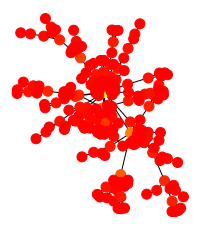

In [4]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(111)

net = ba_network(200, 1)
nodes = net.nodes()
degrees_dict = nx.degree(net)
degrees = [degrees_dict[node] for node in nodes]

print("The maximum degree is: ", max(degrees))
print("The total number of edges is: ", len(net.edges()))

nx.draw_spring(
    net, node_size=100, node_color=degrees, cmap='autumn',
    vmin=np.min(degrees), vmax=np.max(degrees))
ax.set_aspect('equal')

figure_filename = 'BA_visualized.pdf'

fig.savefig(figure_filename) # or just use plt.show() and save manually


### b. BA network probability distribution
- Generate a new network using parameters $N=10^4$ with $m=2$ and plot the logarithmically binned probability density function for degree, $P(k)$ (on double logarithmic axes, `ax.loglog`)
- Compare your result with the theoretical prediction of $P(k)=2m\left(m+1\right)/\left[k\left(k+1\right)\left(k+2\right)\right]$ (proved in the next exercise). To do this, plot both the experimental and theoretical distributions on the same axes.

**Hints**:
- You can get a list of the degrees of a network \code{G} with `degrees=nx.degree(G).values()`
- For plotting the binned degree PDF, have a look at the materials for the binning tutorial in MyCourses.
- There is no simple rule of thumb for selecting the number of bins. However, ideally there should be no empty bins, but on the other hand one would like to have as many bins as possible to best present the shape of the true distribution.
- Generating the results should take a few seconds. If your code is taking too long to run, there are probably ways to improve its efficiency.
- For the interested: When plotting the degree PDF, you may end up with empty bins with small values of $k$. (Consider e.g. if you had a bin [3.1, 3.9]: this bin would always have value zero.) To circumvent this, it is often practical to bin degree-distributions using  `lin-log` bins: [0.5, 1.5, 2.5, \ldots, 9.5, 10.5, 12.5, 16.5, \ldots ] so that one does not end up with empty bins with small values of $k$. \textbf{If you wish}, you may bin your data using logarithmic bins or this more sophisticated approach of `lin-log` bins.

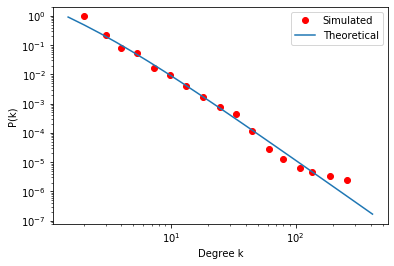

In [5]:
net = ba_network(10000, 2)
degrees = [deg for _, deg in nx.degree(net)]
# if you are using an older version of networkx where the return value of nx.degree is a dict instead of
# a DegreeView, you will get a type error from the above line. To fix, change it to:
# degrees = list(nx.degree(net).values())

fig = plt.figure()
ax = fig.add_subplot(111)

# so use np.histogram to get histogram and bin edges
bins = lin_log_bins(max(degrees))
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)

bincenters, _, _ = binned_statistic( degrees, degrees, statistic='mean', bins=bins)
ax.set_xlabel('Degree k')
ax.set_ylabel('P(k)')

ax.loglog(bincenters, pk, 'ro', label='Simulated')
ax.loglog(bins, 2 * 2 * (2 + 1) /
            (bins * (bins + 1) * (bins + 2)),
            label='Theoretical')

ax.legend()

figure_filename = 'BA_degree_distribution.pdf'

fig.savefig(figure_filename) # or just use plt.show() and save manually